In [1]:
#Step 0: import the libraries 
import pandas as pd
import numpy as np

#to visualize and show chart
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#step 1: Read the dataset
df = pd.read_csv('new_IMDb_movies.csv')

C:\Users\hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#keep the wanted columns
df_clean = df[['title','year', 'genre', 'duration', 'country', 'language', 'director', 'writer',
               'production_company', 'actors', 'avg_vote', 'votes']] 
# Take a look at our new dataset
df_clean.head(3)

,title,year,genre,duration,country,language,director,writer,production_company,actors,avg_vote,votes
0,Miss Jerry,1894,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",5.9,154
1,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",6.1,589
2,Den sorte drøm,1911,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",5.8,188


### Cleaning the data ###
----

In [4]:
#drop all the rows with Null values
df_clean = df_clean.dropna() 
df_clean.isna().sum()

title                 0
year                  0
genre                 0
duration              0
country               0
language              0
director              0
writer                0
production_company    0
actors                0
avg_vote              0
votes                 0
dtype: int64

In [5]:
#check if there's duplicate
df_clean.duplicated(subset = 'title').sum() 

3360

In [6]:
# Delete the duplicate rows
df_clean.drop_duplicates(subset ="title",keep = False, inplace = True)
df_clean.duplicated(subset = 'title').sum()

0

In [7]:
# see the shape of our dataset
df_clean.shape

(73429, 12)

In [8]:
# delete the movie with 'TV Movie 2019' in year
df_clean = df_clean[df_clean.year != 'TV Movie 2019'] 
# change the type of (year) to integar
df_clean['year'] = df_clean['year'].astype('int') 

# leave only the movies produce after 2000
indexNames = df_clean[df_clean['year'] < 2000].index  
df_clean.drop(indexNames, inplace = True)

#Exploring the data
----------

In [9]:
# list of short movies (shorter than 60 minutes)
short_movies=df_clean[(df_clean['duration']<=60) ].sort_values('duration')
short_movies[['title', 'year', 'duration']]

,title,year,duration
54562,My Little Pony: Equestria Girls - Holidays Unw...,2019,44
33687,Respirar (Debaixo D'água),2000,45
52225,Der goldene Nazivampir von Absam 2 - Das Gehei...,2008,45
55191,Concrete shark,2020,45
55849,Journey to Mecca,2009,45
...,...,...,...
54075,Psycho-Pass: Sinners of the System Case.2 Firs...,2019,60
70982,Otel mertvetsov,2013,60
53944,The Last Confession of Alexander Pearce,2008,60
76009,A la recherche de l'Ultra-Sex,2015,60


In [10]:
# The shortest movie in IMDb
shortest =df_clean[df_clean['duration']==df_clean['duration'].min()][['title','duration','year']]
shortest 

,title,duration,year
54562,My Little Pony: Equestria Girls - Holidays Unw...,44,2019


In [11]:
# The longest movie in IMDb
longest = df_clean[df_clean['duration']==df_clean['duration'].max()][['title','duration','year']]
longest

,title,duration,year
85057,La flor,808,2016


In [12]:
#Create a new table for the movie's genre and number of movies in each genres
# to find The most genres of the movies made in
genres=pd.DataFrame(index=[], columns=["genre","count", "full_rating", "avg_rating"])

for index,movie in df_clean.iterrows():
    for genre in movie["genre"].split(", "):
        if(len(genres[genres["genre"] == genre]) < 1):
            genres.loc[len(genres.index)] = [genre, 0,0,0]
        genres.loc[genres["genre"] == genre, "count"] += 1
        genres.loc[genres["genre"] == genre, "full_rating"] += movie["avg_vote"]

In [13]:
#count the average rating to each genre
for index,genre in genres.iterrows():
    genres["avg_rating"] = genres["full_rating"] / genres["count"]

In [14]:
# sort the genres by number of movies
genres = genres.sort_values("count", ascending=False)
genres.head(10)

,genre,count,full_rating,avg_rating
5,Drama,22393,136889.5,6.113049
0,Comedy,14038,79418.4,5.657387
2,Romance,6203,36854.8,5.941448
12,Thriller,6118,32548.4,5.320105
3,Action,6014,33005.0,5.488028
6,Horror,4989,22989.1,4.607958
4,Crime,4350,25434.6,5.847034
9,Adventure,3058,17240.1,5.637704
11,Mystery,2456,13690.6,5.574349
17,Family,2015,11468.5,5.691563


In [15]:
# to minimise number of raws delete any genre isn't count more than 3 movies
genres['count'] = genres['count'].astype('int')
genres.drop(genres[genres['count'] < 4].index, inplace = True)

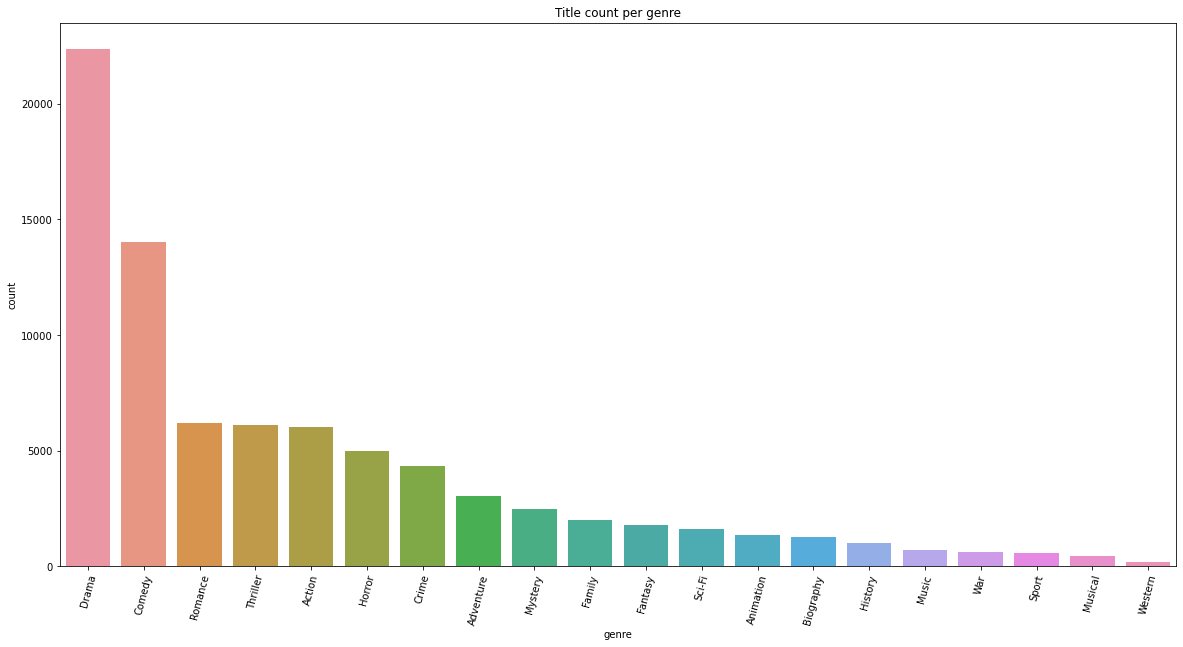

In [16]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=75)
sns.barplot(y="count",x="genre", data=genres, order=genres.sort_values("count", ascending=False)["genre"]);
plt.title('Title count per genre');

In [17]:
##Create a new table for the movie's language and number of movies in each language
#To find The top (10) Languages in which movies are produced
languages =pd.DataFrame(index=[], columns=["language","count", "full_rating", "avg_rating"])

for index,movie in df_clean.iterrows():
    for language in movie["language"].split(", "):
        if(len(languages[languages["language"] == language]) < 1):
            languages.loc[len(languages.index)] = [language, 0,0,0]
        languages.loc[languages["language"] == language, "count"] += 1
        languages.loc[languages["language"] == language, "full_rating"] += movie["avg_vote"]

In [18]:
#count the average rating to each language
for index,language in languages.iterrows():
    if(language["count"] != 0):
        language["avg_rating"] = language["full_rating"] / language["count"]

In [19]:
# to minimise number of raws delete any language isn't count more than 100 movies
languages['count'] = languages['count'].astype('int')
languages.drop(languages[languages['count'] < 101].index, inplace = True)

In [20]:
# sort the languages by number of movies
languages = languages.sort_values("count", ascending=False)
languages.head(10)

,language,count,full_rating,avg_rating
0,English,20950,113673.1,5.425924
1,French,3986,24264.7,6.087481
4,Spanish,3229,19340.5,5.989625
3,German,2178,13300.5,6.106749
2,Japanese,2036,12856.1,6.314391
6,Hindi,1611,9224.0,5.725636
10,Italian,1508,8976.8,5.952785
5,Russian,1367,8267.2,6.047696
14,Mandarin,1112,6755.2,6.07482
18,Korean,924,5922.8,6.409957


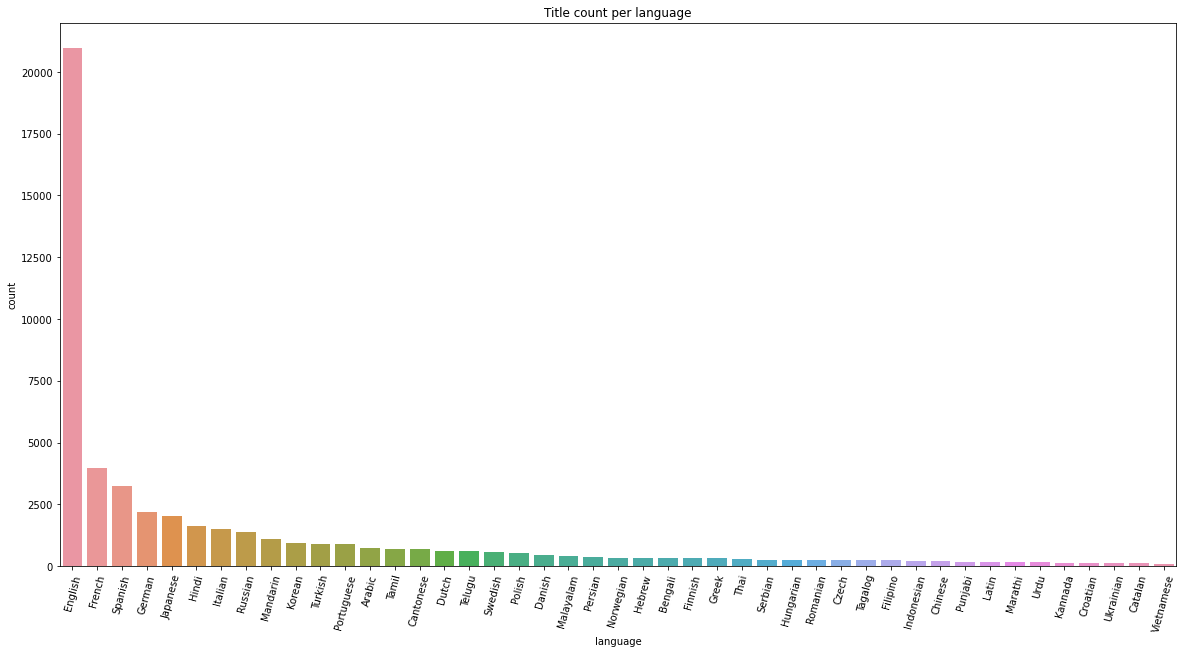

In [21]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=75)
sns.barplot(y="count",x="language", data=languages, order=languages.sort_values("count", ascending=False)["language"]);
plt.title('Title count per language');

In [22]:
##Create a new table for the countries prduced movies and number of movies for each country
#To fint the top (10) countries producing movies content
countries=pd.DataFrame(index=[], columns=["country","count", "full_rating", "avg_rating"])

for index,movie in df_clean.iterrows():
    for country in movie["country"].split(", "):
        if(len(countries[countries["country"] == country]) < 1):
            countries.loc[len(countries.index)] = [country, 0,0,0]
        countries.loc[countries["country"] == country, "count"] += 1
        countries.loc[countries["country"] == country, "full_rating"] += movie["avg_vote"]

In [23]:
#count the average rating to each country
for index,country in countries.iterrows():
    if(country["count"] != 0):
        country["avg_rating"] = country["full_rating"] / country["count"]

In [24]:
# to minimise number of raws delete any country isn't prduce more than 100 movies
countries['count'] = countries['count'].astype('int')
countries.drop(countries[countries['count'] < 101].index, inplace = True)

In [25]:
# sort the countries by number of movies
countries = countries.sort_values("count", ascending=False)
countries.head(10)

,country,count,full_rating,avg_rating
0,USA,13905,73951.7,5.318353
2,France,4159,25583.3,6.15131
6,India,3630,22149.5,6.101791
17,UK,3214,18375.1,5.717206
13,Germany,2764,16731.4,6.053329
12,Canada,2244,12482.7,5.562701
1,Japan,1890,11989.3,6.343545
16,Italy,1454,8549.6,5.880055
9,Spain,1417,8341.2,5.886521
36,Belgium,1034,6346.7,6.138008


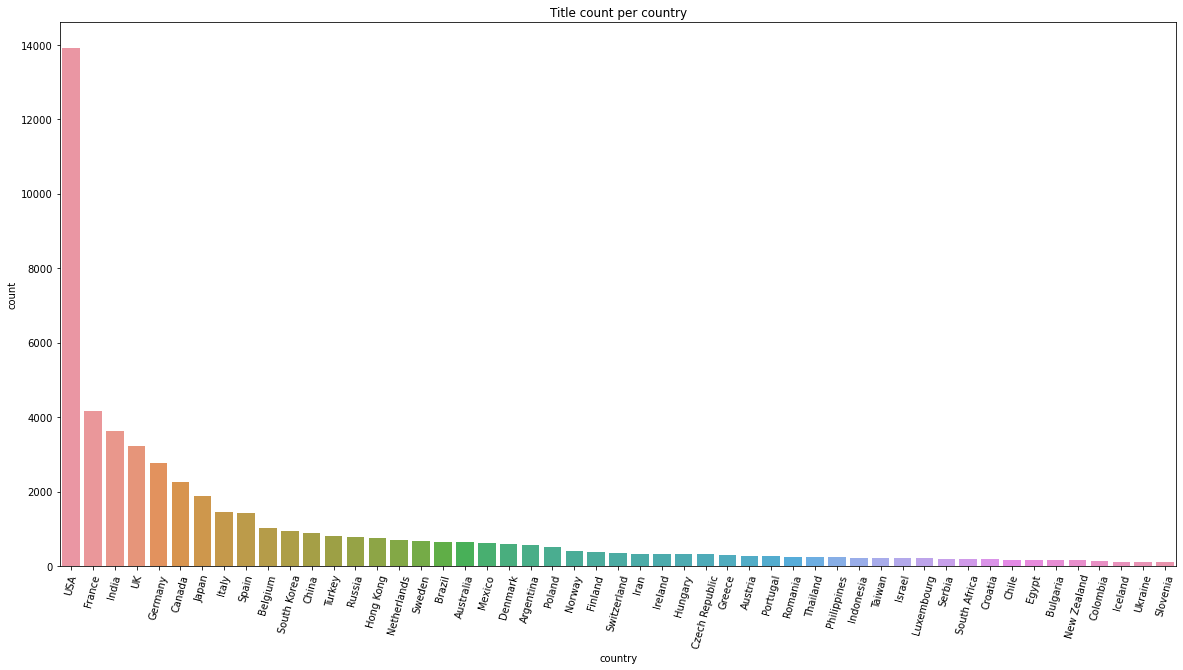

In [26]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=75)
sns.barplot(y="count",x="country", data=countries, order=countries.sort_values("count", ascending=False)["country"]);
plt.title('Title count per country');

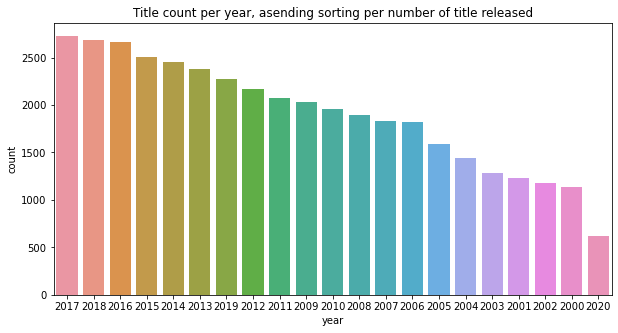

In [27]:
#Show how many movies produce in each year
fig_dim = (10,5)  
fig, ax = plt.subplots(figsize = fig_dim)
sns.countplot(x = 'year', data = df_clean, order = df_clean['year'].value_counts().index)
plt.title('Title count per year, asending sorting per number of title released');

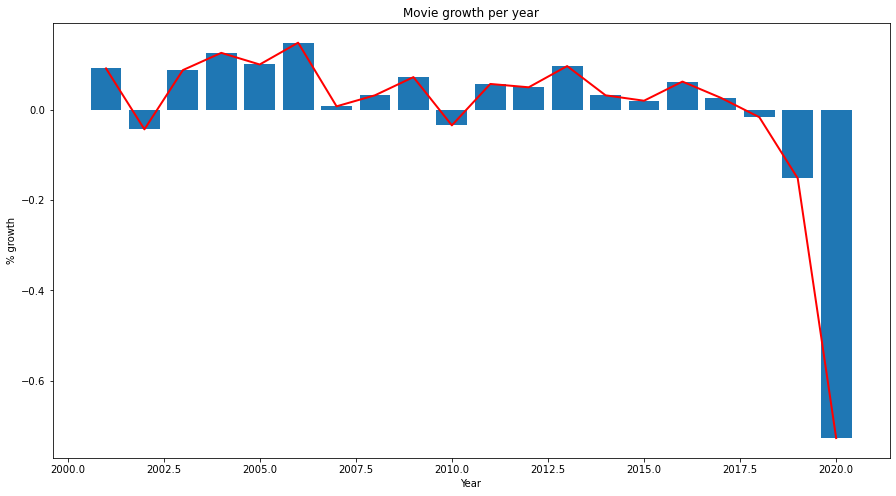

In [28]:
title=pd.DataFrame(columns=['Title Count'])

title = df_clean.groupby('year').agg({'title': ['count']})
title.columns = ['Title Count']
title = title.sort_values('Title Count', ascending = False)
title = title.sort_index() #sort by year. The year is the index
growth = title.pct_change() #calculate the %growth year by year
growth.columns = ['% growth']
plt.figure(figsize = (15, 8))
x = growth['% growth']
y = growth.index
plt.bar(y, x)
plt.plot(y, x, color = 'red', linewidth = 2.0)
plt.title('Movie growth per year')
plt.xlabel('Year')
plt.ylabel('% growth');

In [29]:
# put index 
title.reset_index(inplace=True)
title.tail()

,year,Title Count
16,2016,2659
17,2017,2728
18,2018,2682
19,2019,2274
20,2020,621


In [30]:
#Delet year 2020 because it's effected of COVID-19 Pandemic.(it make outlines)
title.drop(20, inplace=True)

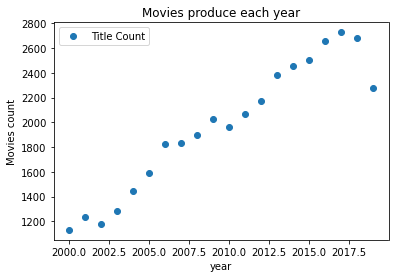

In [31]:
#Show the number of Movies produce each year
title.plot(x='year', y='Title Count', style='o');
plt.title('Movies produce each year')
plt.xlabel('year')
plt.ylabel('Movies count')
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


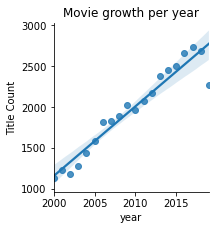

In [32]:
#Draw the relation between the year and the Movies produce each year
sns.pairplot(data= title, x_vars= 'year', y_vars= 'Title Count', size= 3, kind='reg')
plt.title('Movie growth per year');

In [33]:
# Import libraries to built models

from sklearn.linear_model import LinearRegression, Ridge 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error, r2_score

The first Model:
----
    Predict the number of movies will produce next year
   

In [34]:
X = title['year'].values.reshape(-1,1)
y = title['Title Count']

In [35]:
# split the data into train and test set
# hold out 20% of the data for testing
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [36]:
# LinearRegression with(Train\Test) technice

lm2 = LinearRegression()

lm2.fit(X2_train, y2_train)
print(f'Linear Regression on test R^2: {lm2.score(X2_test, y2_test):.3f}')

Linear Regression on test R^2: 0.719


In [41]:
y2_pred = np.round(lm2.predict(X2_test))
y2_pred

array([2824., 1163., 2921., 1846., 2042., 2726., 1651., 2335.])

In [42]:
z = np.array(2019)
print(lm2.predict(z.reshape(1, -1)))

[2921.22876151]


In [43]:
#Create table to see the difference between the Actual numbers and Predicted numbers
df2 = pd.DataFrame({'Actual': y2_test, 'Predicted': y2_pred})
df2

,Actual,Predicted
18,2682,2824.0
1,1234,1163.0
19,2274,2921.0
8,1894,1846.0
10,1959,2042.0
17,2728,2726.0
6,1823,1651.0
13,2381,2335.0


C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


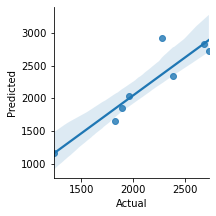

In [44]:
sns.pairplot(data= df2, x_vars= 'Actual', y_vars= 'Predicted', size= 3, kind='reg');

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


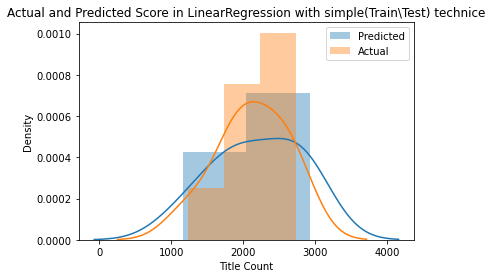

In [45]:
#Show the difference between the Actual numbers and Predicted numbers
sns.distplot(y2_pred, label= 'Predicted' );
sns.distplot(y2_test, label= 'Actual');
plt.legend(loc='upper right')
plt.title('Actual and Predicted Score in LinearRegression with simple(Train\Test) technice');

In [46]:
#****Train\Validation\Test****
X1, X1_test, y1, y1_test = train_test_split(X, y, test_size=.2, random_state=10)
X1_train, X1_val, y1_train, y1_val = train_test_split(X1, y1, test_size=.25, random_state=3)

In [47]:
# LinearRegression with(Train\Validation\Test) technice
lm1 = LinearRegression()

lm1.fit(X1_train, y1_train)
print(f'Linear Regression on validation R^2: {lm1.score(X1_val, y1_val):.3f}')
print(f'Linear Regression test R^2: {lm1.score(X1_test, y1_test):.3f}')

Linear Regression on validation R^2: -1.556
Linear Regression test R^2: 0.297


In [49]:
y1_pred = np.round(lm1.predict(X1_test))
y1_pred

array([1717., 1961., 1554., 1635.])

In [50]:
#Create table to see the difference between the Actual numbers and Predicted numbers
df = pd.DataFrame({'Actual': y1_test, 'Predicted': y1_pred})
df

,Actual,Predicted
7,1836,1717.0
10,1959,1961.0
5,1588,1554.0
6,1823,1635.0


C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


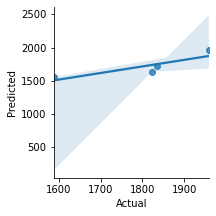

In [51]:

sns.pairplot(data= df, x_vars= 'Actual', y_vars= 'Predicted', size= 3, kind='reg');

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


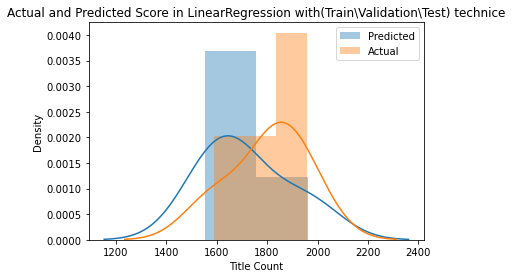

In [52]:
#Show the difference between the Actual numbers and Predicted numbers
sns.distplot(y1_pred, label= 'Predicted' );
sns.distplot(y1_test, label= 'Actual');
plt.legend(loc='upper right')
plt.title('Actual and Predicted Score in LinearRegression with(Train\Validation\Test) technice');

In [53]:
# trying Linear Regression and Ridge Model with scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X1_train)
X_val_scaled = scaler.transform(X1_val)
X_test_scaled = scaler.transform(X1_test)

lm_reg = Ridge(alpha=1)
lm_reg.fit(X_train_scaled, y1_train)

print(f'Ridge Regression on validation R^2: {lm_reg.score(X_val_scaled, y1_val):.3f}')
print(f'Ridge Regression on test R^2: {lm_reg.score(X_test_scaled, y1_test):.3f}')

Ridge Regression on validation R^2: -3.196
Ridge Regression on test R^2: 0.405


In [54]:
y3_pred = np.round(lm_reg.predict(X_test_scaled))
y3_pred

array([1725., 1950., 1574., 1649.])

In [55]:
#Create table to see the difference between the Actual numbers and Predicted numbers
df3 = pd.DataFrame({'Actual': y1_test, 'Predicted': y3_pred})
df3

,Actual,Predicted
7,1836,1725.0
10,1959,1950.0
5,1588,1574.0
6,1823,1649.0


C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


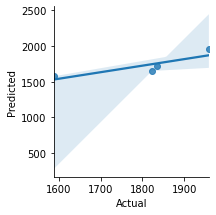

In [56]:
sns.pairplot(data= df3, x_vars= 'Actual', y_vars= 'Predicted', size= 3, kind='reg');

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


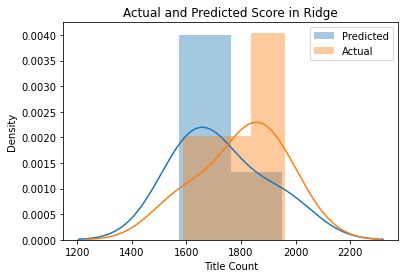

In [57]:
#Show the difference between the Actual numbers and Predicted numbers
sns.distplot(y3_pred, label= 'Predicted' );
sns.distplot(y1_test, label= 'Actual');
plt.legend(loc='upper right')
plt.title('Actual and Predicted Score in Ridge');

In [59]:
#Trying Polynomial Regression to predict the target
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)
X_test_poly = poly.transform(X_test_scaled)

lm_poly2 = LinearRegression()
lm_poly2.fit(X_train_poly, y1_train)
print(f'Degree 2 polynomial regression on Val R^2: {lm_poly2.score(X_val_poly, y1_val):.3f}')
print(f'Degree 2 polynomial regression on Test R^2: {lm_poly2.score(X_test_poly, y1_test):.3f}')
y4_pred = np.round(lm_reg.predict(X_test_scaled))
y4_pred

Degree 2 polynomial regression on Val R^2: -2.538
Degree 2 polynomial regression on Test R^2: 0.664


array([1725., 1950., 1574., 1649.])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


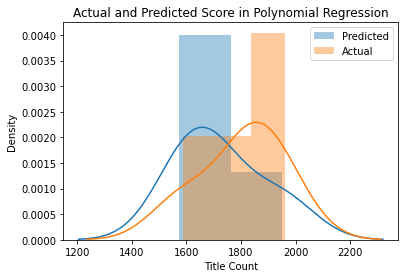

In [60]:
#Show the difference between the Actual numbers and Predicted numbers
sns.distplot(y4_pred, label= 'Predicted' );
sns.distplot(y1_test, label= 'Actual');
plt.legend(loc='upper right')
plt.title('Actual and Predicted Score in Polynomial Regression');

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [62]:
#Cross-Validation 
lm = LinearRegression()
kf = KFold(n_splits=4, shuffle=True, random_state = 71)
cross_val_score(lm, X, y, cv=kf, scoring='r2')

array([ 0.96235196,  0.95576419,  0.90174203, -0.07745342])

In [65]:
print(np.mean(cross_val_score(lm, X, y, cv=kf, scoring='r2')))

0.685601188280006


#conclusion
-----
The best Model to predict the target was
the simple linear regression with simple train and test techniques
with R^2 = 0.719 on the test set


This is the score of all the models I did:

*** the simple linear regression with simple train and test techniques --> R^2 = 0.719 

*** linear regression with (train\Validation\test) --> R^2 = 0.29

*** Ridge Regression on test --> R^2: 0.40

*** Cross-Validation --> 0.6856

***	Degree 2 polynomial regression on test --> R^2: 0.664


-------------------------------

The Second Model:
----
    Predict the average rating for the new movie depend on some features such as:
    (genre, production company, language, country)

In [66]:
# sort it by the average rating
genre2 = genres.sort_values("avg_rating", ascending=False)
genre2.head()

,genre,count,full_rating,avg_rating
16,Biography,1271,8381.7,6.594571
14,History,985,6279.6,6.375228
13,Animation,1354,8435.0,6.22969
15,War,594,3692.7,6.216667
10,Music,716,4440.4,6.201676


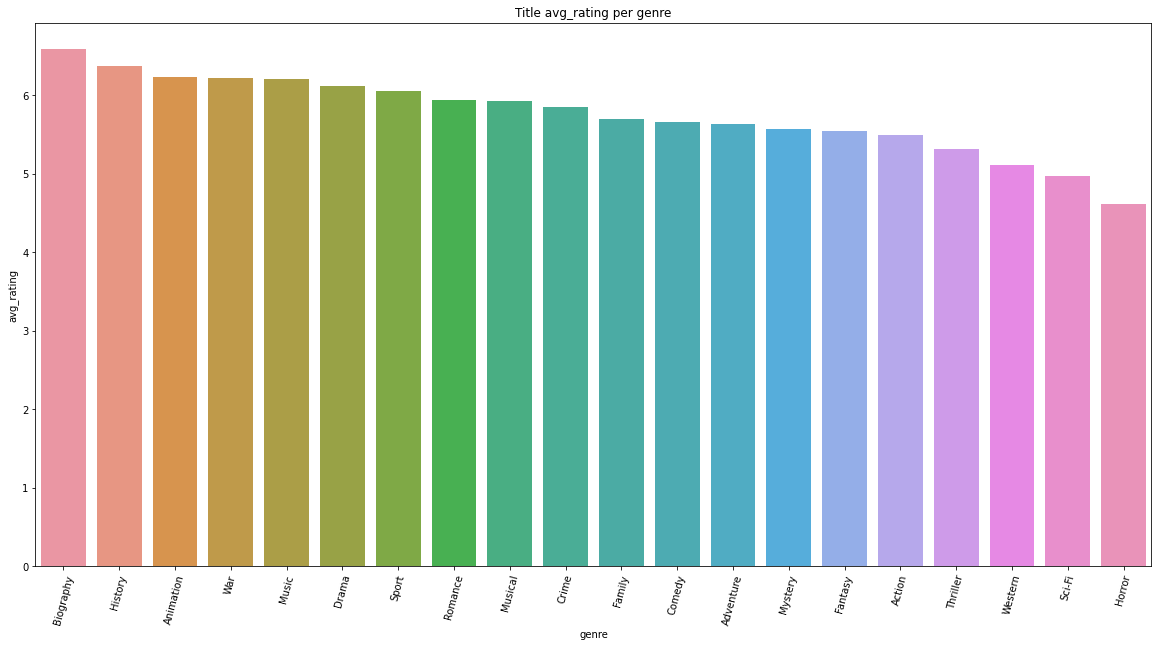

In [67]:
#show the relation between the Movie's Genre and the average rate 
plt.figure(figsize=(20,10))
plt.xticks(rotation=75)
sns.barplot(y="avg_rating",x="genre", data=genre2, order=genre2.sort_values("avg_rating", ascending=False)["genre"]);
plt.title('Title avg_rating per genre');

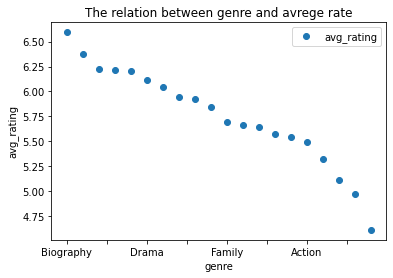

In [68]:
genre2.plot(x='genre', y='avg_rating', style='o');
plt.title('The relation between genre and avrege rate')
plt.xlabel('genre')
plt.ylabel('avg_rating')
plt.show()

In [72]:
#Encoding the genres column 
genre2 = pd.get_dummies(genres, columns=['genre'])
genre2.head(3)

,count,full_rating,avg_rating,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Drama,...,genre_Horror,genre_Music,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Sport,genre_Thriller,genre_War,genre_Western
5,22393,136889.5,6.113049,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
0,14038,79418.4,5.657387,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6203,36854.8,5.941448,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [73]:
#Leave only the average tating and movie;s genre
genre2 = genre2.drop(['full_rating','count'], axis=1)

In [74]:
#split the data into train and test set
Z, f = genre2.drop('avg_rating',axis=1).values, genre2['avg_rating'].values
Z1, Z1_test, f1, f1_test = train_test_split(Z, f, test_size=.2, random_state=10)

# hold out 20% of the data for final testing
Z1_train, Z1_val, f1_train, f1_val = train_test_split(Z1, f1, test_size=.25, random_state=3)

In [75]:
#Trying Polynomial Regression to predict the target
poly = PolynomialFeatures(degree=2) 

Z_train_poly = poly.fit_transform(Z1_train)
Z_val_poly = poly.transform(Z1_val)
Z_test_poly = poly.transform(Z1_test)

lm_poly2 = LinearRegression()
lm_poly2.fit(Z_train_poly, f1_train)
print(f'Degree 2 polynomial regression on Val R^2: {lm_poly2.score(Z_val_poly, f1_val):.3f}')
print(f'Degree 2 polynomial regression on Test R^2: {lm_poly2.score(Z_test_poly, f1_test):.3f}')

Degree 2 polynomial regression on Val R^2: -7.835
Degree 2 polynomial regression on Test R^2: -0.449


In [76]:
f_pred = lm_poly2.predict(Z_test_poly)
f_pred.shape

(4,)

In [77]:
Z_test_poly.shape

(4, 231)

In [78]:
poly = PolynomialFeatures(degree=2) 

Z2_train_poly = poly.fit_transform(Z1)
Z2_test_poly = poly.transform(Z1_test)

lm_poly3 = LinearRegression()
lm_poly3.fit(Z2_train_poly, f1)
print(f'Degree 2 polynomial regression on train R^2: {lm_poly3.score(Z2_train_poly, f1):.3f}')
print(f'Degree 2 polynomial regression on Test R^2: {lm_poly3.score(Z_test_poly, f1_test):.3f}')

Degree 2 polynomial regression on train R^2: 1.000
Degree 2 polynomial regression on Test R^2: -2.304


In [79]:
#Trying RandomForestRegressor to predict the target 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [80]:
RLR = RandomForestRegressor(n_estimators=100)
RLR.fit(Z1_train, f1_train)
print(RLR.score(Z1_train, f1_train))
print(RLR.score(Z1_val,f1_val))
f_pred = RLR.predict(Z1_test)
f_pred

0.8389150149287925
-9.348898020805313


array([5.68637768, 5.68637768, 5.68637768, 5.68637768])

In [81]:
RLR.score(Z1_test,f1_test)

-0.3393445246377973

In [82]:
df5 = pd.DataFrame({'Actual': f1_test, 'Predicted': f_pred})
df5

,Actual,Predicted
0,5.637704,5.686378
1,5.54489,5.686378
2,4.607958,5.686378
3,5.847034,5.686378


In [93]:
#Create a new table for the production company and number of movies the produce 
company = pd.DataFrame(index=[], columns=["production_company","count", "full_rating", "avg_rating"])

for index,movie in df_clean.iterrows():
    for production_company in movie["production_company"].split(", "):
        if(len(company[company["production_company"] == production_company]) < 1):
            company.loc[len(company.index)] = [production_company, 0,0,0]
        company.loc[company["production_company"] == production_company, "count"] += 1
        company.loc[company["production_company"] == production_company, "full_rating"] += movie["avg_vote"]

In [94]:
#count the average rating for each production_company
for index,production_company in company.iterrows():
    company["avg_rating"] = company["full_rating"] / company["count"]

In [95]:
#company = company.sort_values("avg_rating", ascending=False)
company['count'] = company['count'].astype('int')
# to minimise number of raws delete any production_company isn't prduce more than 20 movies
company.drop(company[company['count'] < 21].index, inplace = True)

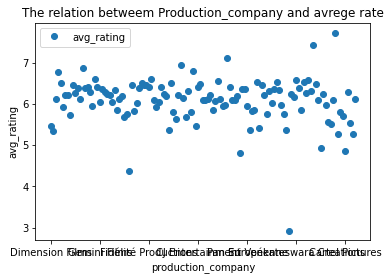

In [96]:
#show the relation between the production company and the average rate 
company.plot(x='production_company', y='avg_rating', style='o');
plt.title('The relation betweem Production_company and avrege rate')
plt.xlabel('production_company')
plt.ylabel('avg_rating')
plt.show()

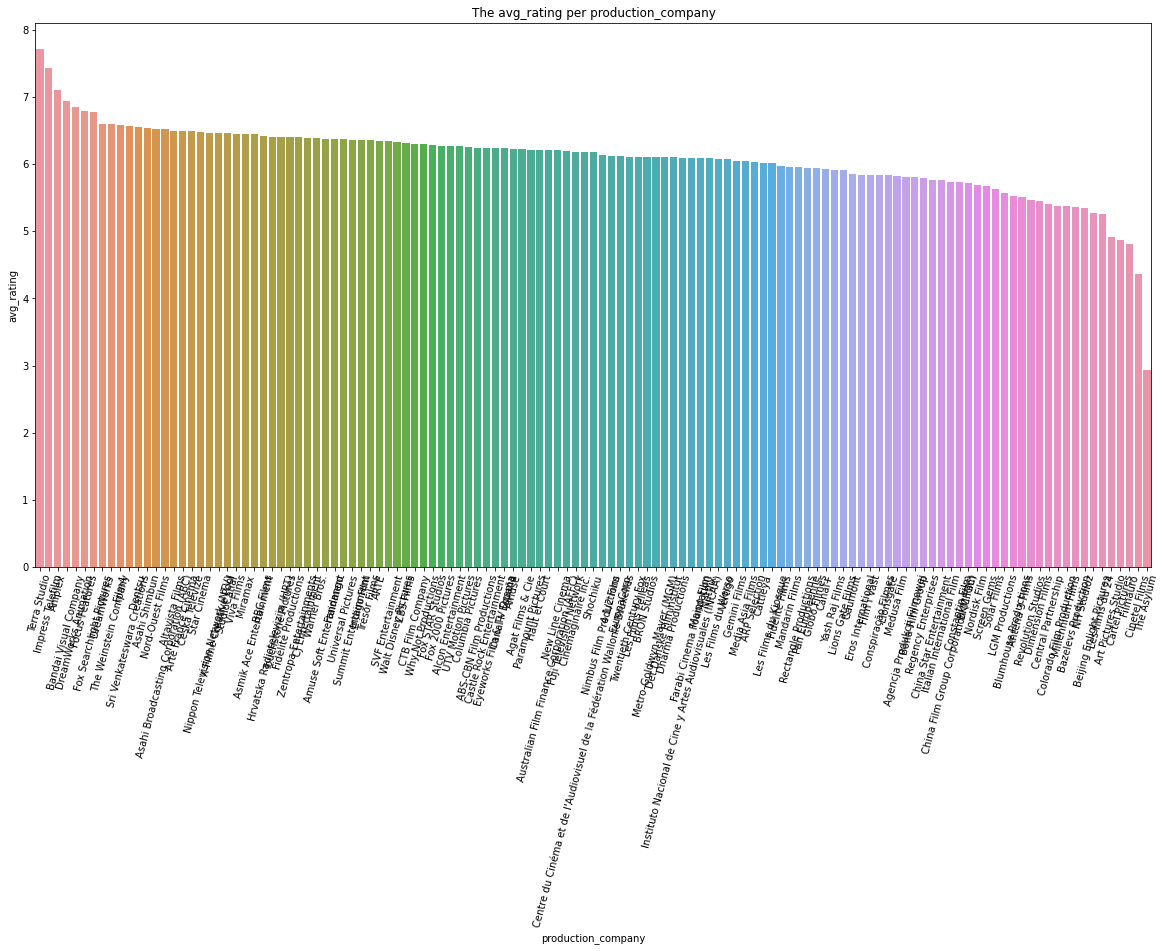

In [97]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=75)
sns.barplot(y="avg_rating",x="production_company", data=company, order=company.sort_values
            ("avg_rating", ascending=False)["production_company"]);
plt.title('The avg_rating per production_company');

In [98]:
#Encoding the production company column 
company = pd.get_dummies(company, columns=['production_company']) #can just apply it to the whole df
company.head(3)

,count,full_rating,avg_rating,production_company_4 1/2 Film,production_company_ABS-CBN Film Productions,production_company_ARP Sélection,production_company_ARTE,production_company_Agat Films & Cie,production_company_Agencja Produkcji Filmowej,production_company_Alcon Entertainment,...,production_company_UTV Motion Pictures,production_company_Universal Pictures,production_company_Vertigo,production_company_Viva Films,production_company_Walt Disney Pictures,production_company_Warner Bros.,production_company_Why Not Productions,production_company_X-Filme Creative Pool,production_company_Yash Raj Films,production_company_Zentropa Entertainments
7,55,299.9,5.452727,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,34,181.8,5.347059,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,130,794.8,6.113846,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
comp2 = company.drop(['full_rating','count'], axis=1)

In [100]:
C, v = comp2.drop('avg_rating',axis=1).values, comp2['avg_rating'].values
C1, C1_test, v, v_test = train_test_split(C, v, test_size=.2, random_state=10)

# hold out 20% of the data for final testing
C1_train, C1_val, v1_train, v1_val = train_test_split(C1, v, test_size=.25, random_state=3)

In [101]:
comp_linear = LinearRegression()

comp_linear.fit(C1,v)
print(comp_linear.score(C1,v))
print(f'Linear Regression on test R^2: {comp_linear.score(C1_test, v_test):.3f}')

1.0
Linear Regression on test R^2: -0.029


In [102]:
v_pred = comp_linear.predict(C1_test)
Pre = pd.DataFrame({'Actual': v_test, 'Predicted':v_pred })
Pre.head()

,Actual,Predicted
0,6.476,6.109186
1,6.42,6.109186
2,6.461538,6.109186
3,6.092857,6.109186
4,5.518182,6.109186


In [104]:
comp_linear = LinearRegression()
C1_train, C1_val, v1_train, v1_val = train_test_split(C1, v, test_size=.25, random_state=3)
comp_linear.fit(C1_train,v1_train)
print(comp_linear.score(C1_train,v1_train))
print(f'Ridge Regression on validation R^2: {comp_linear.score(C1_val, v1_val):.3f}')
print(f'Ridge Regression on test R^2: {comp_linear.score(C1_test, v_test):.3f}')

1.0
Ridge Regression on validation R^2: -6.550
Ridge Regression on test R^2: -2.228


# for the second model:

I started to explore the relation between the average rating and (Movie’s genre and the production company).

I plotted the charts and encoded the categories value to apply the suitable model.

I tried Linear, Polynomial, and random forest regression

but unfortunately, I didn’t get a good score.